In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

# Dataset 1 - Airbnb Dataset

In [9]:
airbnb =pd.read_csv("Airbnb Dataset 19.csv")

In [38]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [39]:
#column host_id is not needed, its dropped
airbnb.drop('host_id', axis = 1, inplace = True)

In [40]:
#data of Name column needs to be proper function
airbnb["name"] = airbnb["name"].str.upper().str.title()

In [41]:
#data remove which contain NAN in 'last-review'column
airbnb = airbnb.dropna(axis=0, subset = ['last_review'])

In [42]:
airbnb.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3,3831,Cozy Entire Floor Of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 Br Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129


In [8]:
airbnb.dtypes

id                                  int64
name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,31667.024793,40.729170,-73.964527,144.272727,8.479339,106.438017,1.091653,1.752066,197.219008
std,17953.882898,0.048392,0.029916,92.279028,20.365172,100.201324,1.000168,1.247610,124.700661
min,2539.000000,40.631880,-74.080880,40.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,16430.250000,40.688108,-73.985222,85.000000,2.000000,24.250000,0.280000,1.000000,75.000000
50%,28651.500000,40.720280,-73.965835,125.000000,3.000000,79.500000,0.795000,1.000000,224.000000
75%,46864.000000,40.759568,-73.948373,175.000000,5.000000,167.000000,1.650000,2.000000,307.000000
max,62430.000000,40.864820,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [10]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 248
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              242 non-null    int64  
 1   name                            242 non-null    object 
 2   host_name                       242 non-null    object 
 3   neighbourhood_group             242 non-null    object 
 4   neighbourhood                   242 non-null    object 
 5   latitude                        242 non-null    float64
 6   longitude                       242 non-null    float64
 7   room_type                       242 non-null    object 
 8   price                           242 non-null    int64  
 9   minimum_nights                  242 non-null    int64  
 10  number_of_reviews               242 non-null    int64  
 11  last_review                     242 non-null    object 
 12  reviews_per_month               242 

In [11]:
airbnb.isna().sum()

id                                0
name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
airbnb.shape[0]

242

In [13]:
airbnb['price'].mean()

144.27272727272728

# Bar plot is use to show the price and the room_type.  price and room_type column is used from the Airbnb Dataset

<AxesSubplot:xlabel='room_type', ylabel='price'>

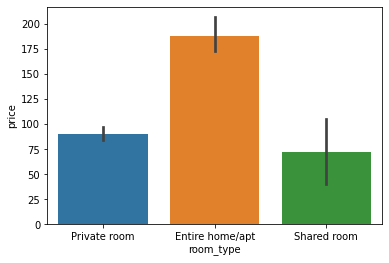

In [14]:
sns.barplot(y='price', x ='room_type', data =airbnb)

# Bar plot is use to show the price and the locality.  price and neighbourhood_group column is used from the Airbnb Dataset

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

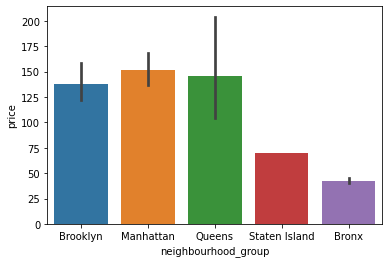

In [15]:
sns.barplot(y='price', x ='neighbourhood_group', data =airbnb)

# Scatterplot is use to show the price and the roomtype.  price and room_type column is used from the Airbnb Dataset

<AxesSubplot:xlabel='room_type', ylabel='price'>

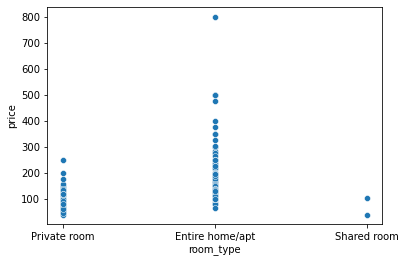

In [16]:
sns.scatterplot(x=airbnb.room_type, y =airbnb.price)

# Scatterplot is use to show the price with minimum_nights.  price and minimum_nights column is used from the Airbnb Dataset

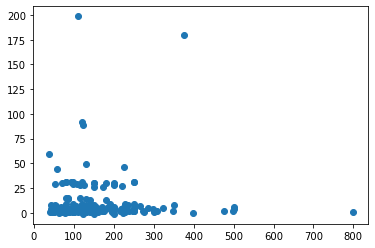

In [32]:
x = np.random.normal(airbnb.price)
y = np.random.normal(airbnb.minimum_nights)

plt.scatter(x, y)
plt.show()


# Distributionplot is use to show the price.  price column is used from the Airbnb Dataset

C:\Users\V3iT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


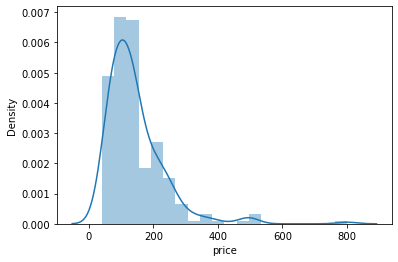

In [17]:
sns.distplot(airbnb['price'], bins = 20)
plt.show()

# Displot is use with threshold the price to show the price.  price column is used from the Airbnb Dataset

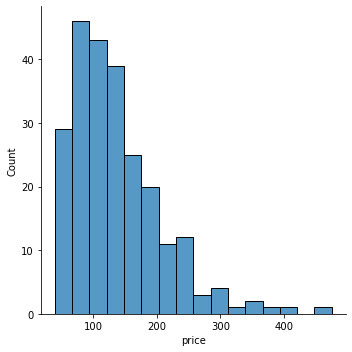

In [18]:
threshold = airbnb['price'].quantile(0.99) # get 99th quantile of Price
tmpData = airbnb[airbnb['price'] < threshold] # I'm slicing data where price < threshold
sns.displot(data = tmpData, x = 'price')

In [20]:
airbnb.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3,3831,Cozy Entire Floor Of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 Br Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129


In [43]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


# PLotly- barplot is use to show the price with room_type.  price and room_type column is used from the Airbnb Dataset

In [18]:
import plotly.express as px
fig = px.bar(x=airbnb["room_type"], y=airbnb["price"])
fig.show()


# Countlot is use to show the location/place with room_type.  room_type and neighbourhood_group column is used from the Airbnb Dataset

C:\Users\V3iT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



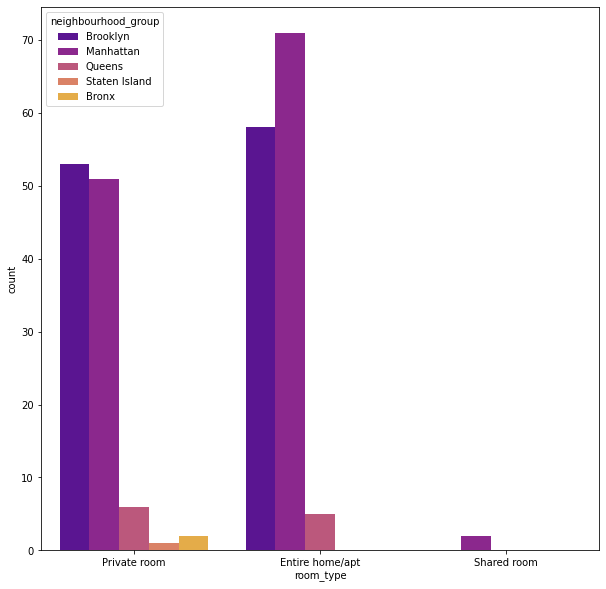

In [23]:
plt.figure(figsize=(10,10))
df1 = sns.countplot(airbnb['room_type'], hue=airbnb['neighbourhood_group'], palette='plasma')


# Boxtlot is use to show the avaiability of property through year.  availability_365 and neighbourhood_group column is used from the Airbnb Dataset

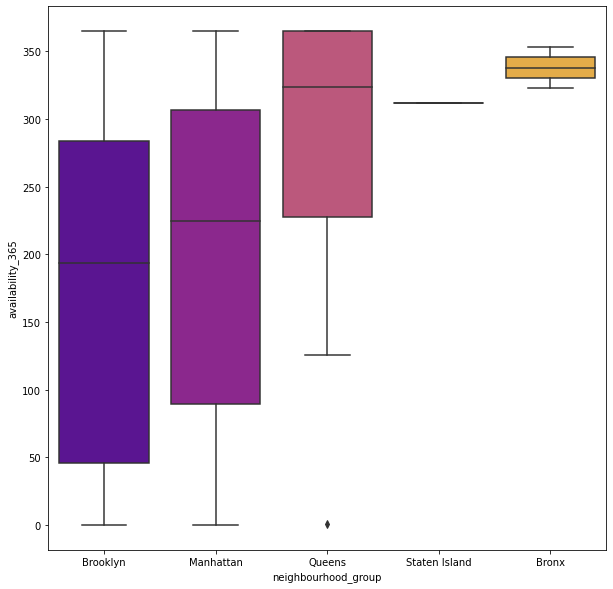

In [25]:
plt.figure(figsize=(10,10))
df1 = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

# DATASET - HRDatase

In [43]:
HRD =pd.read_csv("HRDataset_v14.csv")

In [44]:
HRD.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [28]:
HRD["Employee_Name"] = HRD["Employee_Name"].str.replace(",", "")

In [29]:
HRD.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi Wilson K,10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,Ait Sidi Karthikeyan,10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,Akinkuolie Sarah,10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,AlagbeTrina,10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,Anderson Carol,10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [30]:
HRD.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [31]:
HRD.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [32]:
HRD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# Next Count Plot is use to show the Reasons for Termination.  TermReason column is used from the HRDataset


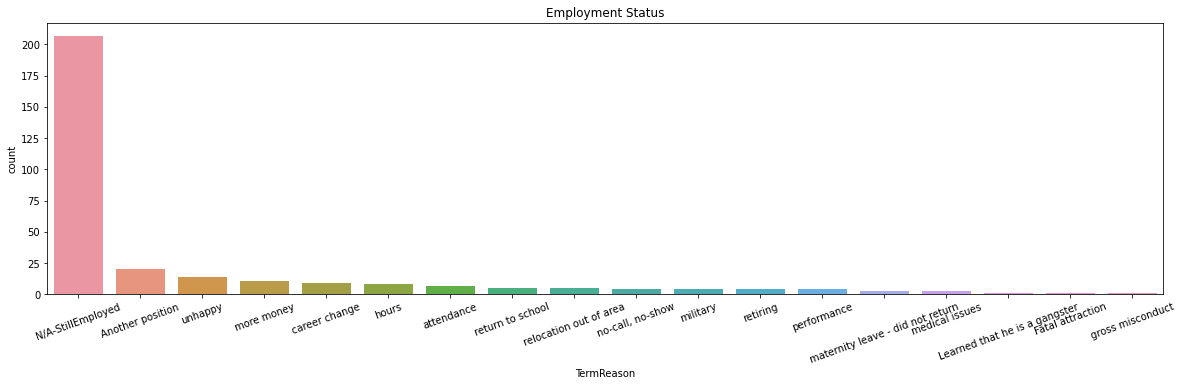

In [33]:
plt.figure(figsize = [20, 5])
ordered = HRD['TermReason'].value_counts().index
sns.countplot(data=HRD, x= 'TermReason', order = ordered);
plt.title('Employment Status');
plt.xticks(rotation=20);


# Next Histogram is use to show the salary scale of the company.  Salary column is used from the HRDataset

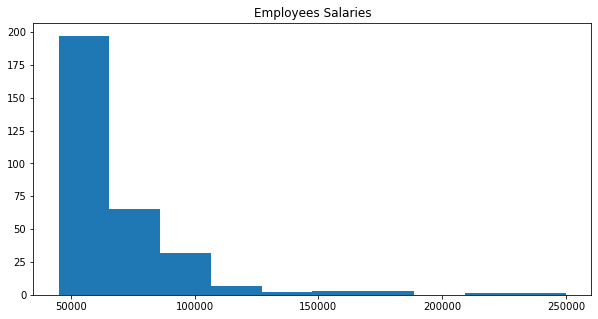

In [34]:
# determine the salary scale of the company

plt.figure(figsize = [10, 5])
bas_color = sns.color_palette()[0]
plt.hist(data=HRD, x= 'Salary', color=bas_color);
plt.title('Employees Salaries');


# Next Piechart is use to show the Which gender is more in the employment.  Salary column is used from the HRDataset

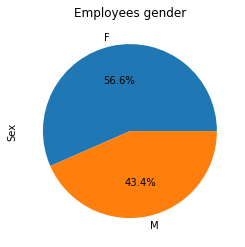

In [35]:
HRD['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title('Employees gender');

# Next Count Plot is use to show the Performance Score of Employees.  'PerformanceScore' column is used from the HRDataset


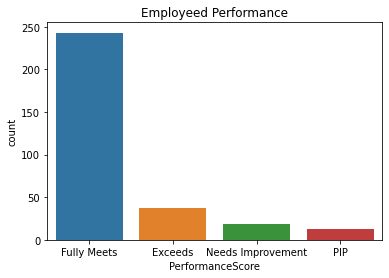

In [36]:
ordered = HRD['PerformanceScore'].value_counts().index
sns.countplot(data=HRD, x= 'PerformanceScore', order = ordered);
plt.title('Employeed Performance');



# Next BOX Plot is use to show the See the Performance of Employees and compare with Salary.  'PerformanceScore'  and "Salary" olumn is used from the HRDataset

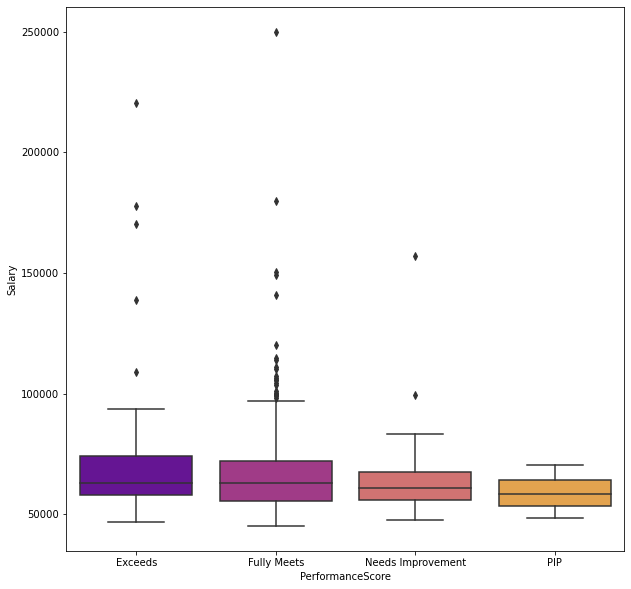

In [46]:
plt.figure(figsize=(10,10))
df1 = sns.boxplot(data=HRD, x='PerformanceScore',y='Salary',palette='plasma')